# Data Anaysis
# Visualization

Disclaimer: The Python data visualization environment is a MESS. It remindes me of this: 


![](standards.png)

### Matplotlib & Extensions

 * [Matplotlib](https://matplotlib.org/) - the elephant in the room
 * [Pandas Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html) - based on Matplotlib
 * [Seaborn](https://seaborn.pydata.org/) - based on Matplotlib, higher-level
 * [ggplot](http://ggplot.yhathq.com/) - based on the popular R plotting library, some similarites, uses Matplotlib.
 
These tools generally can be used to create figures independent of Jupyter. 
 
### Web-based Vis tools

 * [Bokeh](https://bokeh.pydata.org/en/latest/)
 * [Plotly](https://plot.ly/python/)
 * [Altair](https://github.com/altair-viz/altair), based on [Vega](https://vega.github.io/vega/) 
 * [PdVega](https://jakevdp.github.io/pdvega/), based on Vega, integrated with pandas dataframes.
 
 
These tools mostly rely on Jupyter running in your browser and use a JavaScript based language in the backend. 

As of February 2020, it seems like Plotly and Altair are serios contenders for more advanced, interactive visualization.

There are also some domain specific libraries, e.g., for maps and for networks, that we will cover at a later point. 
 
 
There are also [many](https://www.dataquest.io/blog/python-data-visualization-libraries/) [blog](https://codeburst.io/overview-of-python-data-visualization-tools-e32e1f716d10) [posts](https://lisacharlotterost.github.io/2016/05/17/one-chart-code/) [comparing](https://blog.modeanalytics.com/python-data-visualization-libraries/) various data visualization libraries.

Generally speaking, there are 
 * **plotting libraries** that have pre-made charts, and 
 * **drawing libraries** that allow you to freely express anything you can imagine. 
 
We will mainly cover the former, but as visualization reseaerchers we typically rely on tools that enable as much expressivity as possible, such as [D3](https://d3js.org/) or [WebGL](https://developer.mozilla.org/en-US/docs/Web/API/WebGL_API).

We will start of with basic Matplotlib, explore the build-in pandas library, and then look at some more advanced tools.

## Matplotlib

Matplotlib is a project started in 2002 and is inspired by MATLAB plotting. 

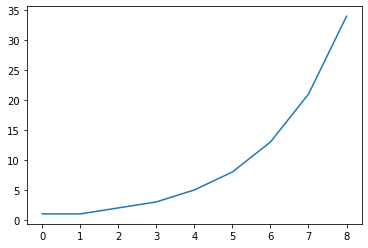

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# code after a % are ipython specific instructions
# this command tells Jupyter/ipython that we want to create the visualizations
# inline in this notebook instead of as files to save.
%matplotlib inline

# an example data vector
fib_series = [1,1,2,3,5,8,13,21,34]

# here we run a simple plot command to create a line chart
plt.plot(fib_series)

The `.plot` command uses a [`figure`](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure) to plot in. If no figure has been defined, it will automatically create one. If there is already a figure, it will plot to the latest figure. 

Here we create a figure manually: 

In [2]:
# we create a figure with size 10 by 10 inches
fig = plt.figure(figsize=(10, 10))

<Figure size 720x720 with 0 Axes>

The figure by itself doesn't plot anyhing. We have to add a [`subplot`](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.add_subplot) to it. 

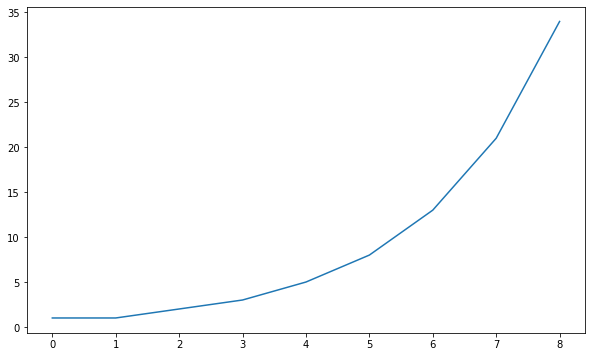

In [3]:
# figsize defines the size of the plot in inches - 10 wide by 6 high here. 
fig = plt.figure(figsize=(10, 6))
# add a suplot to a grid of 1x1, return the 1st figure
my_plot = fig.add_subplot(1,1,1)
# plotting a data array
my_plot.plot(fib_series)

Here we add a title and axis labels: 

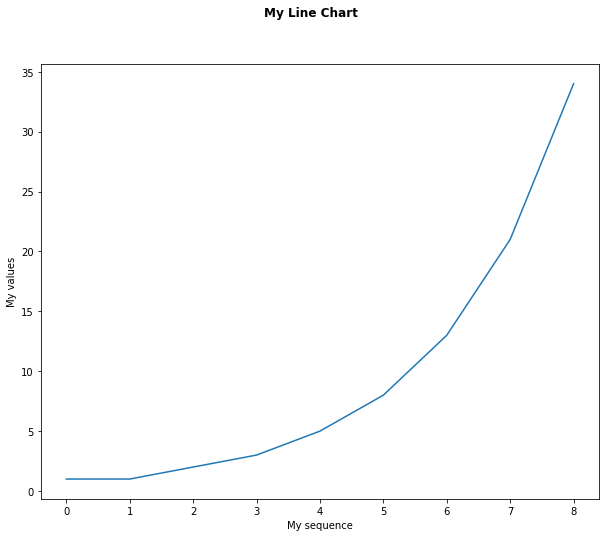

In [4]:
fig = plt.figure(figsize=(10, 8))
my_plot = fig.add_subplot(1,1,1)
fig.suptitle('My Line Chart', fontsize=12, fontweight='bold')
my_plot.set_xlabel("My sequence")
my_plot.set_ylabel("My values")
my_plot.plot(fib_series)

Now let's create a figure with multiple subplots:

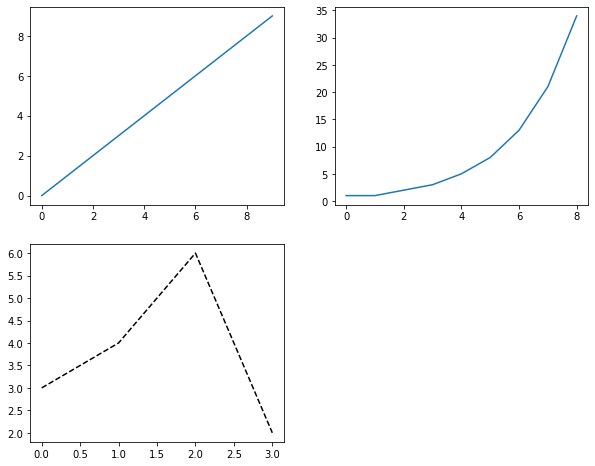

In [5]:
fig = plt.figure(figsize=(10, 8))
# create a subplot in a 2 by 2 grid, 
# return the subplot at position specified in third parameter
# these subplots are often called "axes"
sub_fig_1 = fig.add_subplot(2,2,1)
sub_fig_2 = fig.add_subplot(2,2,2)
sub_fig_3 = fig.add_subplot(2,2,3)

# this will plot to the last figure used
# you shouldn't do that but rather use explicit subplot references if you have them
# k-- is a style option for a black dashed line
plt.plot([3, 4, 6, 2], "k--")

# here is how we can plot explicitly to a subfigure
sub_fig_1.plot(range(0,10))

sub_fig_2.plot(fib_series)

We can use the [`subplots`](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html?highlight=subplots#matplotlib.figure.Figure.subplots) shorthand to create multiple subplots that we can access form an array. 

Next, we're also trying out a couple of different visualziation techniques: 

Visualizations for Correlations
 
 * [Scatterplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter)  
 
Visualizations for raw data, one dimension 
 * [Vertical Bar Chart](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar)
 * [Horizontal Bar Chart](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.barh.html#matplotlib.pyplot.barh)
 * [Pie Chart](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.pie.html#matplotlib.pyplot.pie)
 
Visualizations for distributions 
 * [Boxplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html#matplotlib.pyplot.boxplot)
 * [Histogram](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html?highlight=hist#matplotlib.pyplot.hist)
 * [Violin Plot](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.violinplot.html)

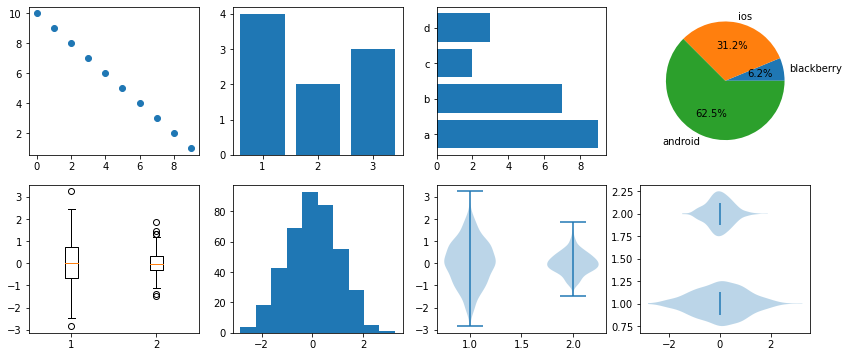

In [6]:
large_dist = np.random.randn(400)
small_dist = np.random.randn(400)*0.5


# a function because we'll reuse these later
def sample_figures():
    # define a figure with subfigures in 2 rows and 3 columns
    fig, subfigs = plt.subplots(2, 4, figsize=(14, 6))

    # Scatterplot. Pass two arrays for your x and y values.
    subfigs[0,0].scatter(range(0,10),range(10,0,-1))
    
    # Bar Chart. First array is x position, second is value (height) of data
    subfigs[0,1].bar([1, 2, 3], [4, 2, 3])
    
    # Horizontal bar chart. 
    # First array contains y positions (expressed as range), second contains data values (lengths of bars), 
    # tick_label is an array of labels
    subfigs[0,2].barh(range(0,4), [9, 7, 2, 3], tick_label=["a", "b", "c", "d"])
    
    # You can also (but maybe you shouldn't) do pie charts. First array is shares of total. 
    # labels in the same order of data. autopct defines how to format the numerical labels 
    # (here, one digit after comma)
    subfigs[0,3].pie([1, 5, 10], labels=["blackberry", "ios", "android"], autopct='%1.1f%%')
    
    # Box plots visualizing two distributions with 100 items each. 
    subfigs[1,0].boxplot([large_dist, small_dist])
    
    # A histogram visualizes a distribution. It takes one array, we can specify bins as second parameter 'bins'
    subfigs[1,1].hist(large_dist)
    
    # A violing plot also visualizes a distribution, using kernel density estimation.  
    subfigs[1,2].violinplot([large_dist, small_dist])
    
    subfigs[1,3].violinplot([large_dist, small_dist], showmeans=True,
        showextrema=False, vert=False)

sample_figures()

### Heat Maps

Heat maps encoded matrix/tabular data using color. There are two ways to implement heatmaps in Matplotlib:

 * [pcolor](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.pcolor.html)
 * [imshow](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html)

imshow is used to display images (which are just matrices, where the pixels have a colorvalue). In practice, imshow and pcolor differ mainly in their coordinate system: the origin of imshow is at the top left (as is common for images), the origin of pcolor is at the bottom left.

For heatmaps, we need a [color map](https://matplotlib.org/tutorials/colors/colormaps.html). Matplotlib has many color maps baked in, also those from http://colorbrewer.org.

In [7]:
# just a helper function to create some 2D data based on a gaussian kernel.
def gkern(l=5, sig=1.):
    """
    creates gaussian kernel with side length l and a sigma of sig
    """
    ax = np.arange(-l // 2 + 1., l // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2. * sig**2))
    return kernel / np.sum(kernel)

kernel = gkern(20, 5)

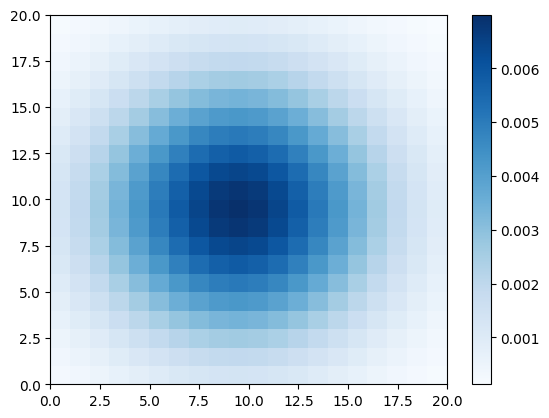

In [8]:
plt.style.use('default')
# select a blue color map
heatmap = plt.pcolor(kernel, cmap=plt.cm.Blues)
# plot the legend on the side
plt.colorbar(heatmap)

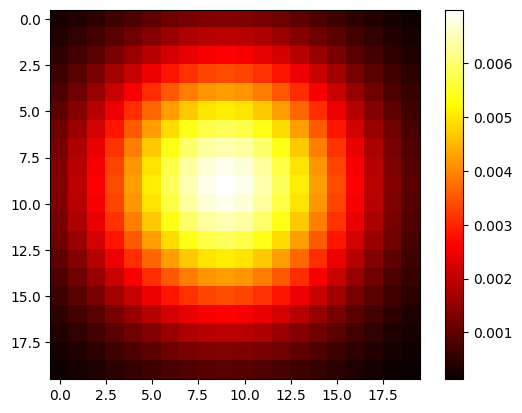

In [9]:
hm = plt.imshow(kernel, cmap='hot')
plt.colorbar(hm)

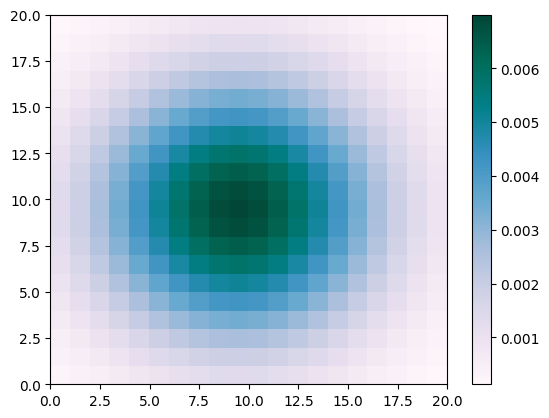

In [10]:
# a diverging color map from Color Brewer
heatmap = plt.pcolor(kernel, cmap=plt.cm.PuBuGn)
plt.colorbar(heatmap)

### Styling

Matplotlib has [different styles](https://matplotlib.org/devdocs/gallery/style_sheets/style_sheets_reference.html) that we can apply globally.

Here are a couple of examples:

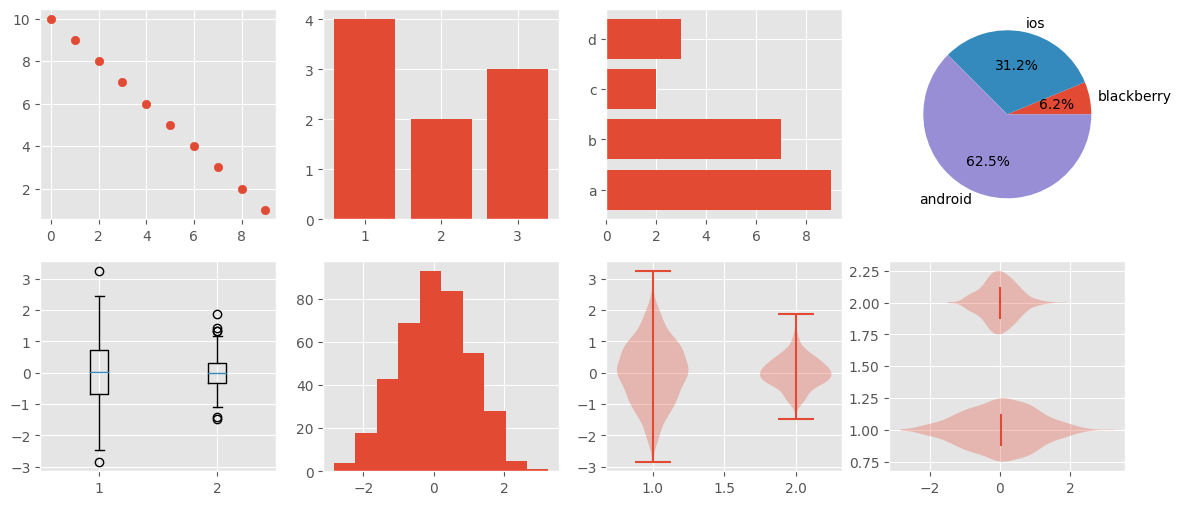

In [11]:
# ggplot style based on the popular R plotting library 
# we will be using this as a default in many lectures
plt.style.use('ggplot')
sample_figures()

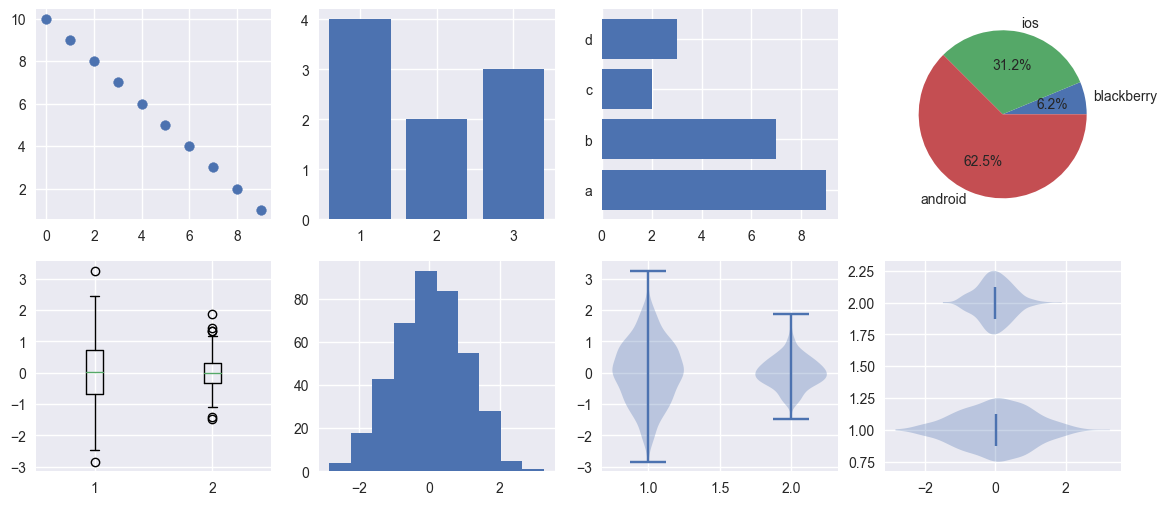

In [12]:
# style based on the seaborn library
plt.style.use('seaborn')
sample_figures()

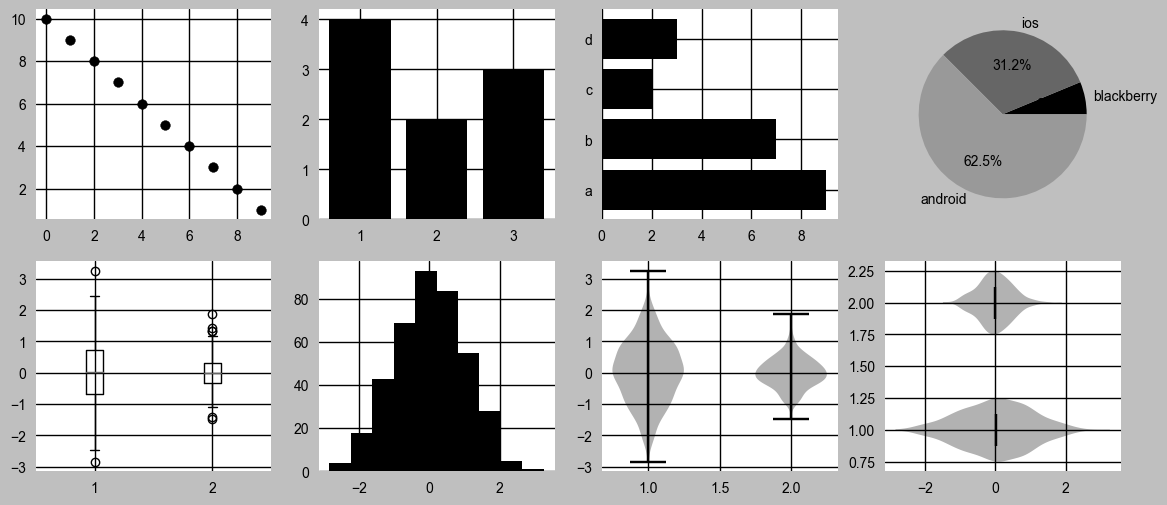

In [13]:
plt.style.use('grayscale')
sample_figures()

## Plotting with Pandas

Pandas has good [built-in plotting capabilities](http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html). We've seen some already in previous lectures and in the homeworks.

We're going to use the movies dataset to demonstrate plots and start of by reproducing some of the work you did for your homework: 

In [14]:
plt.style.use('ggplot')
pd_movies = pd.read_csv('movies.csv')
pd_movies.head()

Unnamed: 0                     title  year  length  budget  rating  votes  \
0           1                         $  1971     121     NaN     6.4    348   
1           2         $1000 a Touchdown  1939      71     NaN     6.0     20   
2           3    $21 a Day Once a Month  1941       7     NaN     8.2      5   
3           4                   $40,000  1996      70     NaN     8.2      6   
4           5  $50,000 Climax Show, The  1975      71     NaN     3.4     17   

     r1    r2   r3  ...    r9   r10  mpaa  Action  Animation  Comedy  Drama  \
0   4.5   4.5  4.5  ...   4.5   4.5   NaN       0          0       1      1   
1   0.0  14.5  4.5  ...   4.5  14.5   NaN       0          0       1      0   
2   0.0   0.0  0.0  ...  24.5  24.5   NaN       0          1       0      0   
3  14.5   0.0  0.0  ...  34.5  45.5   NaN       0          0       1      0   
4  24.5   4.5  0.0  ...   0.0  24.5   NaN       0          0       0      0   

  Documentary  Romance  Short  
0           0        0      0  
1           0        0      0  
2           0        0      1  
3           0        0      0  
4           0        0      0  

[5 rows x 25 columns]

### Line Chart

In [15]:
# subset to major movies
major_movies = pd_movies[pd_movies['votes'] >= 500]
# show yearly number of moves
yearly_movies = major_movies["year"].value_counts().sort_index()

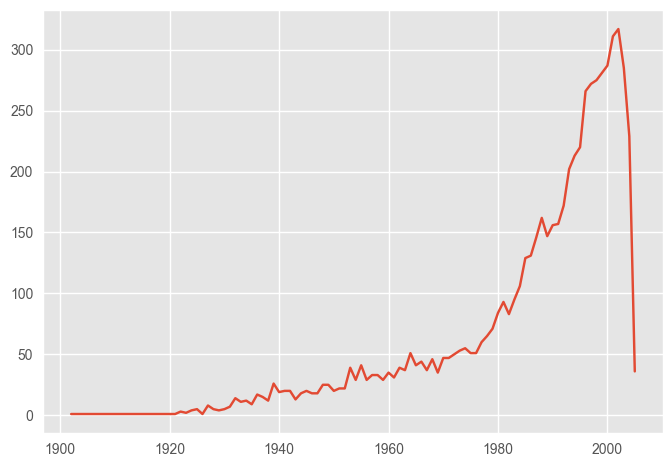

In [16]:
# you can also do this, but it will be deprecated: 
# yearly_movies.plot()
yearly_movies.plot.line()

### Histogram

This is the right way to do this: 

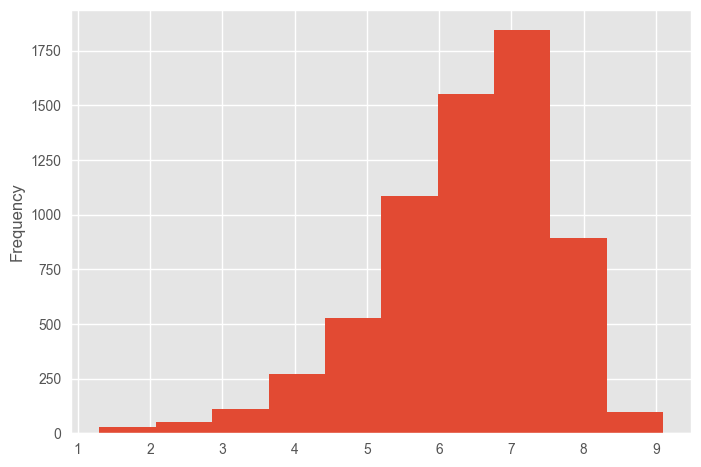

In [17]:
major_movies["rating"].plot.hist()

But there are some legacy methods: 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feded1f7910>]],
      dtype=object)

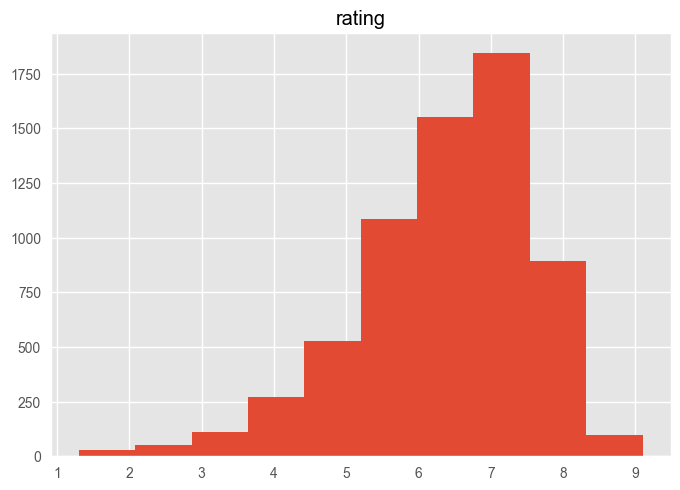

In [18]:
major_movies.hist(column="rating")

Let's load a dataset with multiple dimensions on the same scale, and plot it as histograms. 

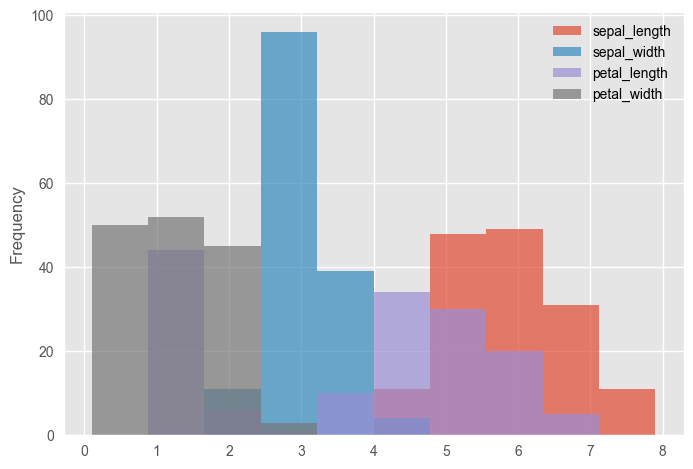

In [19]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

iris.plot.hist(alpha=0.7)

We can also plot KDEs: 

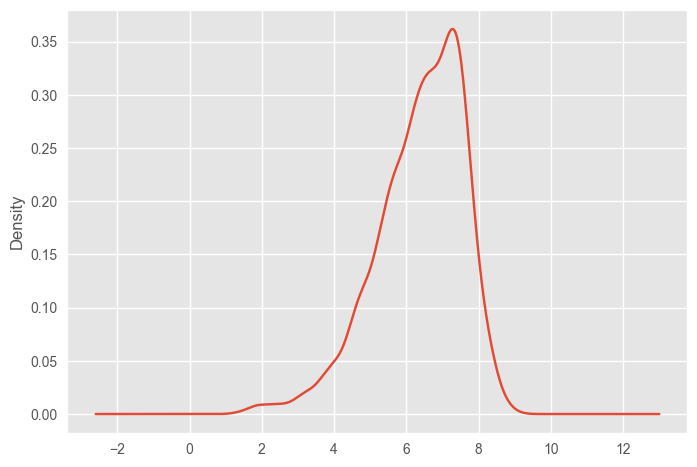

In [20]:
major_movies["rating"].plot.kde()

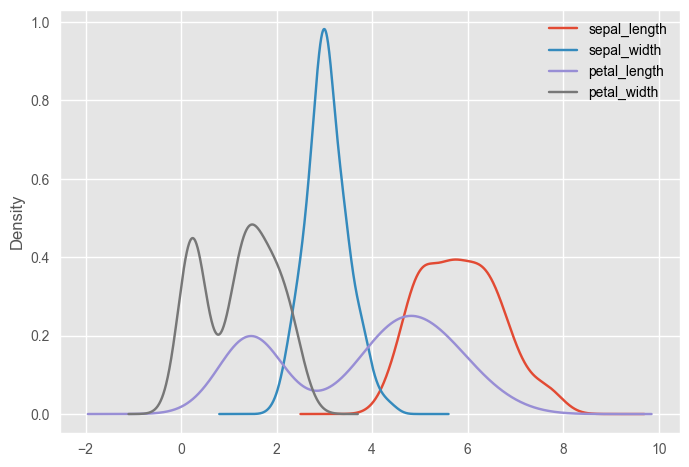

In [21]:
iris.plot.kde()

### Bar Chart

We'll show a bar chart for the first 10 movies

In [22]:
subset = major_movies.set_index("title")
subset = subset.iloc[0:10]
subset

Unnamed: 0  year  length      budget  \
title                                                                      
'A' gai waak                                15  1983     106         NaN   
'A' gai waak juk jaap                       16  1987     101         NaN   
'Breaker' Morant                            17  1980     107         NaN   
'Crocodile' Dundee II                       19  1988     110         NaN   
'I Know Where I'm Going!'                   29  1945      92         NaN   
'Manos' the Hands of Fate                   35  1966      74     19000.0   
'Round Midnight                             44  1986     133         NaN   
'Til There Was You                          48  1997     113  23000000.0   
'burbs, The                                 51  1989     101         NaN   
(T)Raumschiff Surprise - Periode 1          56  2004      87         NaN   

                                    rating  votes    r1   r2   r3    r4  ...  \
title                                                                    ...   
'A' gai waak                           7.1   1259   4.5  4.5  4.5   4.5  ...   
'A' gai waak juk jaap                  7.2    614   4.5  4.5  4.5   4.5  ...   
'Breaker' Morant                       7.9   2718   4.5  4.5  4.5   4.5  ...   
'Crocodile' Dundee II                  5.0   7252   4.5  4.5  4.5  14.5  ...   
'I Know Where I'm Going!'              7.7    825   4.5  4.5  4.5   4.5  ...   
'Manos' the Hands of Fate              1.6   7996  74.5  4.5  4.5   4.5  ...   
'Round Midnight                        7.3    902   4.5  4.5  4.5   4.5  ...   
'Til There Was You                     4.8    799   4.5  4.5  4.5  14.5  ...   
'burbs, The                            6.0   7641   4.5  4.5  4.5   4.5  ...   
(T)Raumschiff Surprise - Periode 1     5.6   1275  14.5  4.5  4.5   4.5  ...   

                                      r9   r10   mpaa  Action  Animation  \
title                                                                      
'A' gai waak                        14.5  24.5  PG-13       1          0   
'A' gai waak juk jaap               14.5  14.5  PG-13       1          0   
'Breaker' Morant                    24.5  24.5    NaN       0          0   
'Crocodile' Dundee II                4.5   4.5    NaN       1          0   
'I Know Where I'm Going!'           14.5  34.5    NaN       0          0   
'Manos' the Hands of Fate            4.5  14.5    NaN       0          0   
'Round Midnight                     14.5  24.5    NaN       0          0   
'Til There Was You                   4.5  14.5  PG-13       0          0   
'burbs, The                          4.5  14.5    NaN       0          0   
(T)Raumschiff Surprise - Periode 1   4.5  14.5    NaN       0          0   

                                    Comedy Drama  Documentary  Romance  Short  
title                                                                          
'A' gai waak                             1     0            0        0      0  
'A' gai waak juk jaap                    1     0            0        0      0  
'Breaker' Morant                         0     1            0        0      0  
'Crocodile' Dundee II                    1     0            0        0      0  
'I Know Where I'm Going!'                0     1            0        1      0  
'Manos' the Hands of Fate                0     0            0        0      0  
'Round Midnight                          0     1            0        0      0  
'Til There Was You                       1     0            0        1      0  
'burbs, The                              1     0            0        0      0  
(T)Raumschiff Surprise - Periode 1       1     0            0        0      0  

[10 rows x 24 columns]

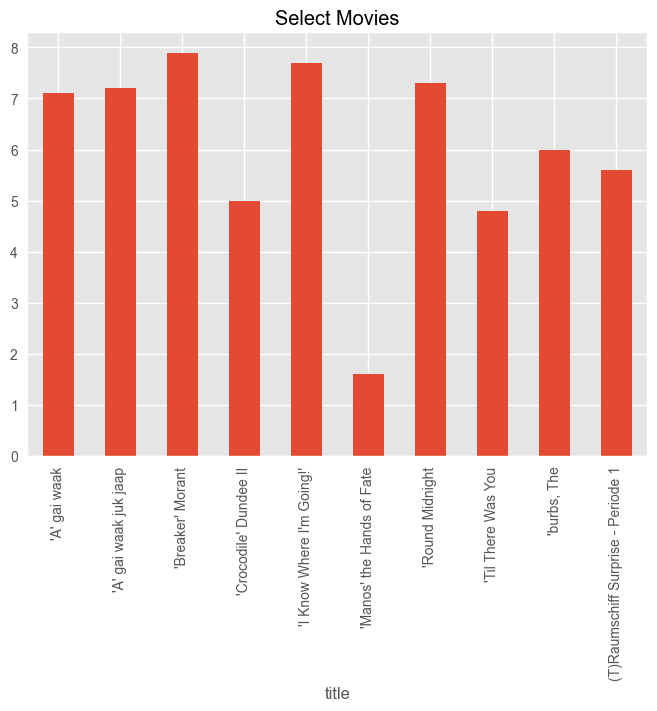

In [23]:
subset["rating"].plot(kind="bar", title="Select Movies")

We can create grouped bar charts. The values should be on the same scale.

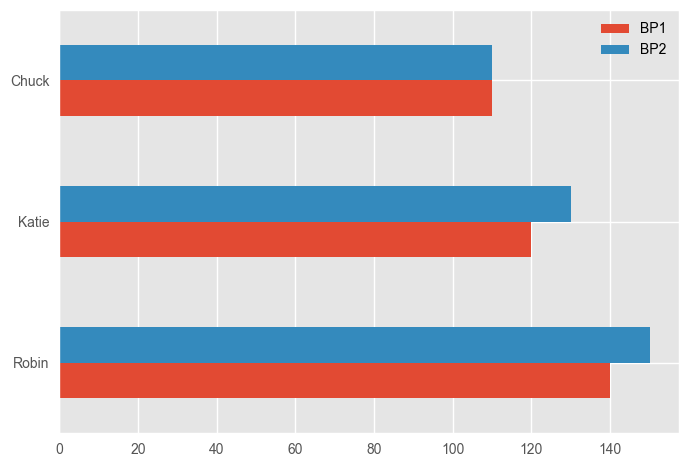

In [24]:
pulse = pd.DataFrame({
        "BP1":[140, 120, 110],
        "BP2":[150, 130, 110]
    })
pulse.index = ["Robin", "Katie", "Chuck"]

pulse.plot(kind="barh")

Equally, we can create stacked bar charts: 

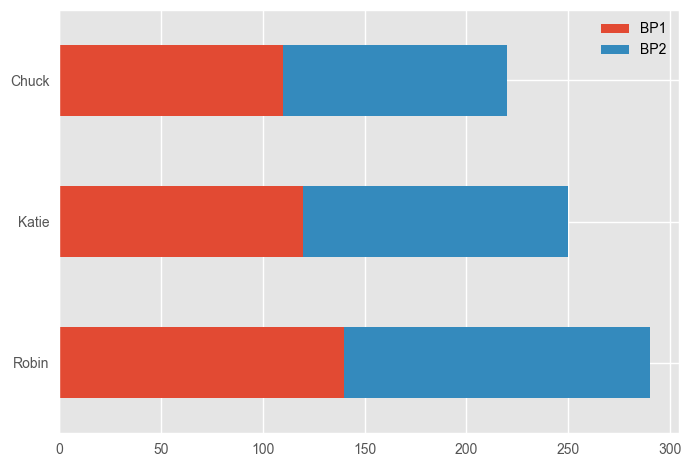

In [25]:
pulse.plot(kind="barh", stacked="True")

### Scatterplot

We can plot a scatterplot, comparing ratings of movies over time:

<Figure size 1000x1000 with 0 Axes>

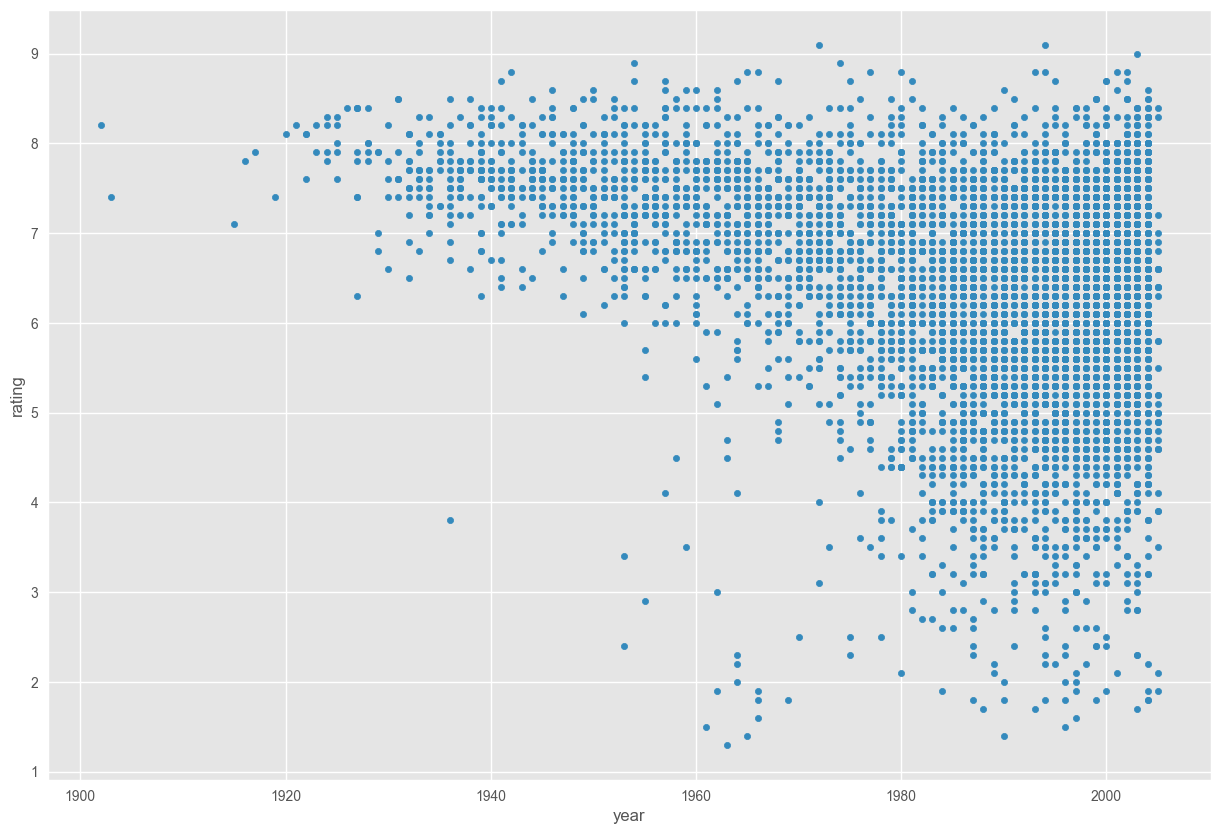

In [26]:
plt.figure(figsize=(10, 10))
major_movies.plot.scatter("year", "rating", figsize=(15, 10))

However, here we might overplot some points in more recent years. We can fix that with an alpha value:

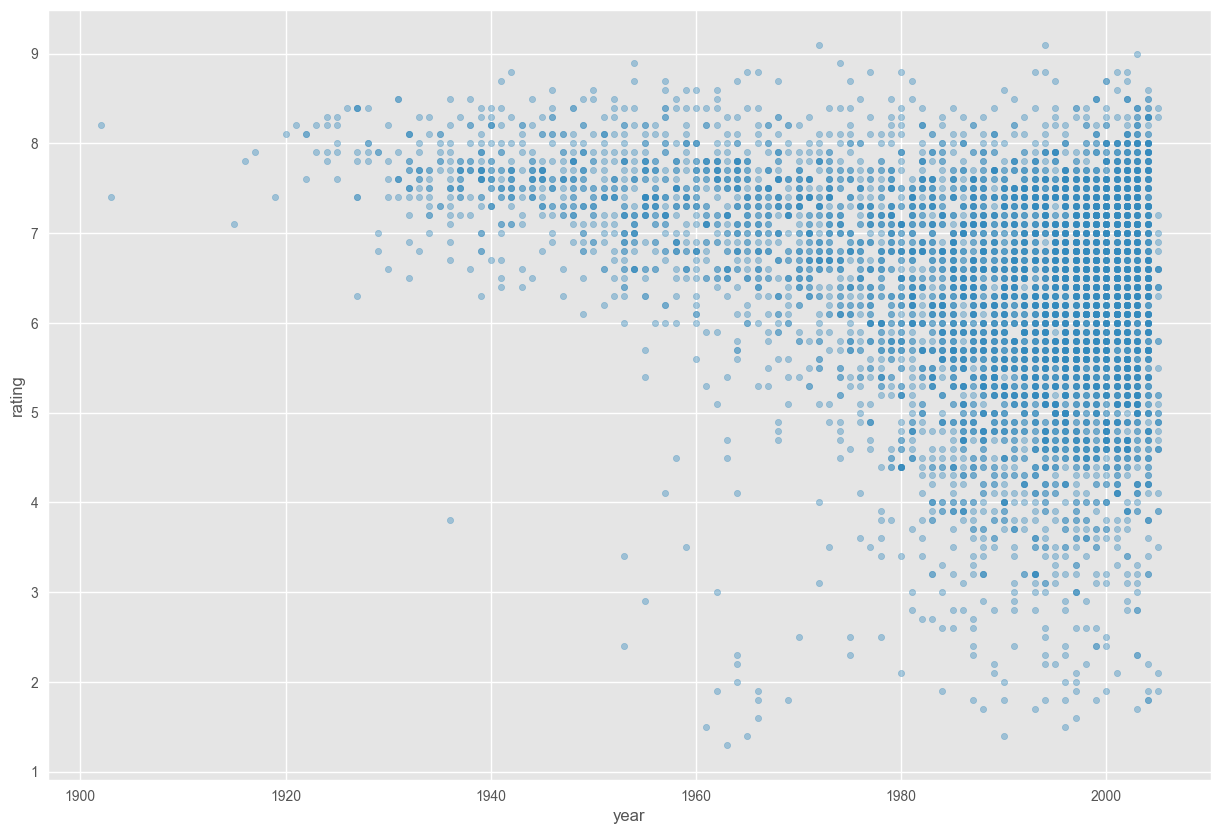

In [27]:
major_movies.plot.scatter("year", "rating", figsize=(15, 10), alpha=0.4)

### Box Plot

Let's plot a box plot of the ratings

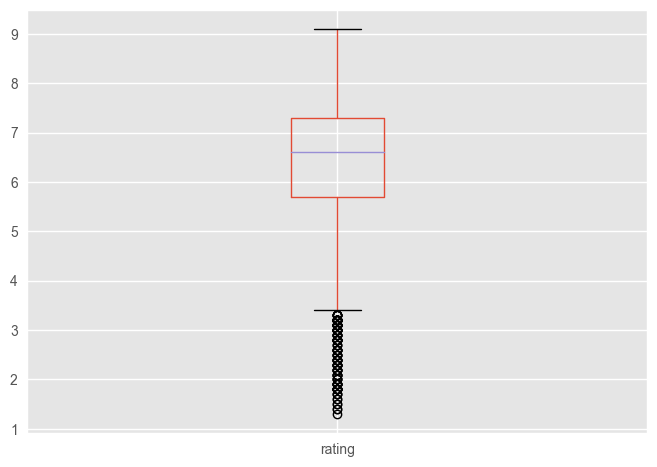

In [28]:
major_movies["rating"].plot.box()

We can also create boxplots for the data grouped by another column. Here, we create a rating box plot for each year: 

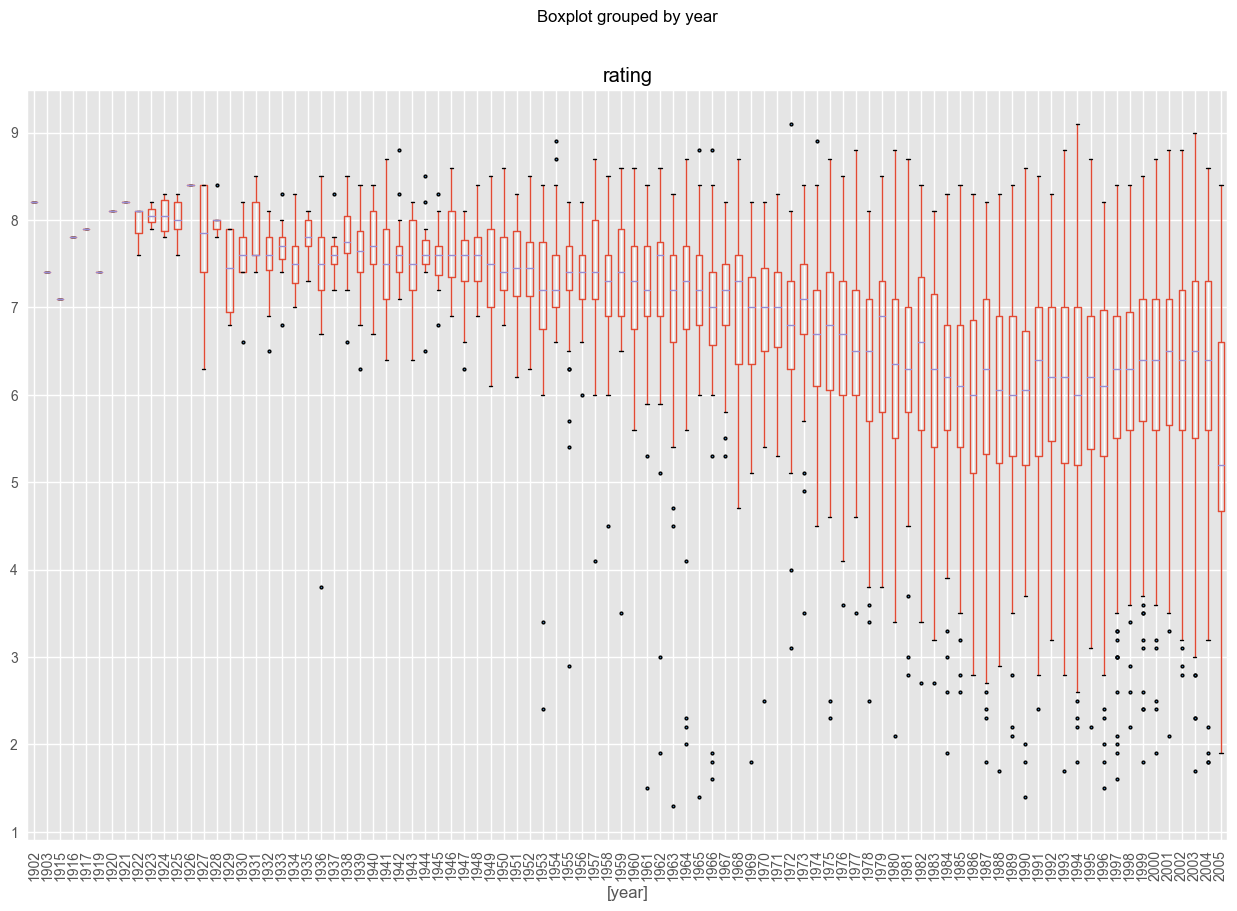

In [29]:
flierprops = dict(marker='o', markerfacecolor='steelblue', markersize=2,
                  linestyle='none')
major_movies.boxplot(column=["rating"], by=["year"], rot=90, figsize=(15,10), flierprops=flierprops)

## Scatterplot Matrix 

We frequently will look at high-dimensional datasets. We can do that conveniently with a scatterplot matrix:

In [30]:
# import the scatter_matrix functionality
from pandas.plotting import scatter_matrix

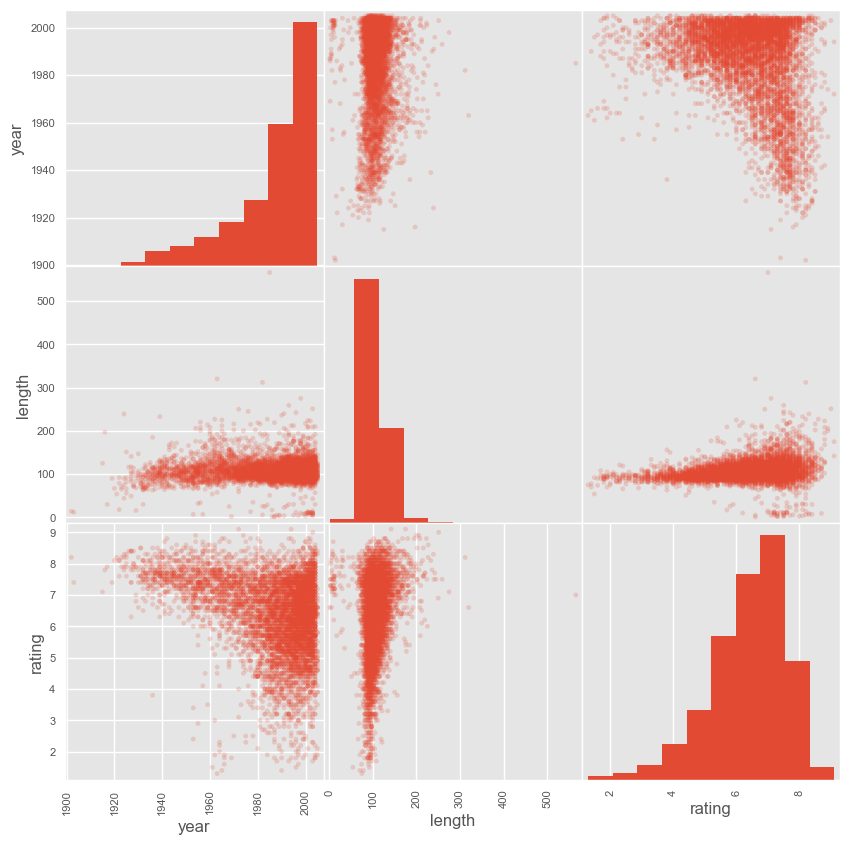

In [31]:
scatter_matrix(major_movies[["year", "length", "rating"]], alpha = 0.2, figsize=(10, 10))
# this supresses the output of the scatter matrix
print()

Here the cells with the same variables in columns and rows are shown as histograms. We can also use KDEs instead: 

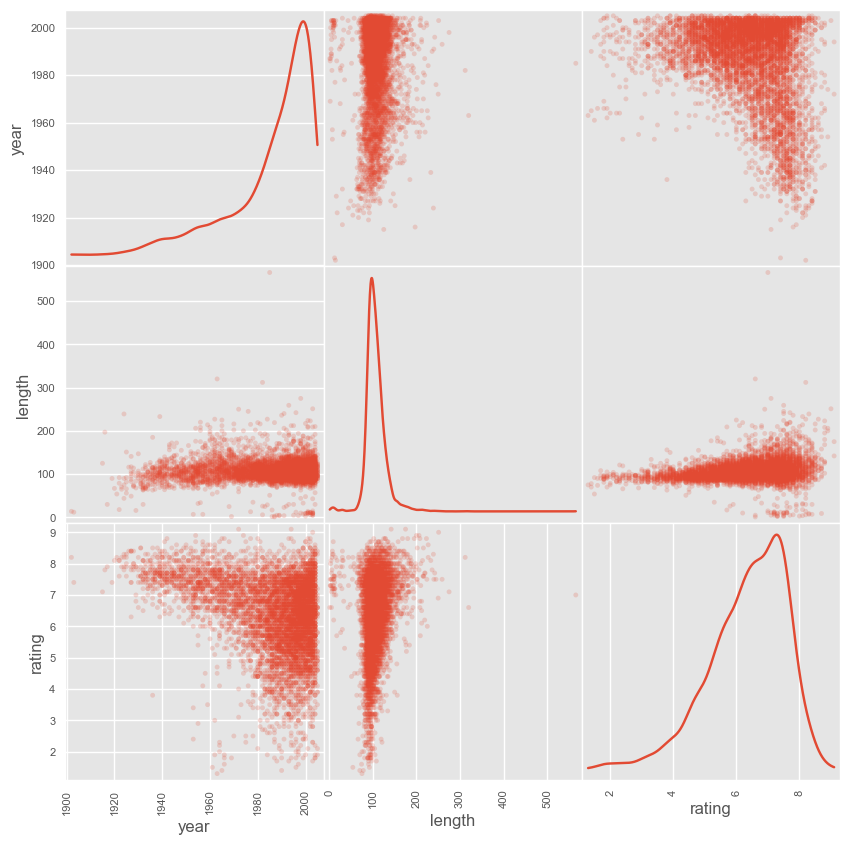

In [32]:
scatter_matrix(major_movies[["year", "length", "rating"]], diagonal="kde", alpha = 0.2, figsize=(10, 10))
print()

We can also use a categorical label to color code a value. To do that, we have to create a series of the length of the dataset that defines the color for each row: 

In [33]:
color_list=iris["species"].map({"setosa":"#ca0020", "virginica":"#0571b0", "versicolor":"#5e3c99"})
color_list.head()

0    #ca0020
1    #ca0020
2    #ca0020
3    #ca0020
4    #ca0020
Name: species, dtype: object

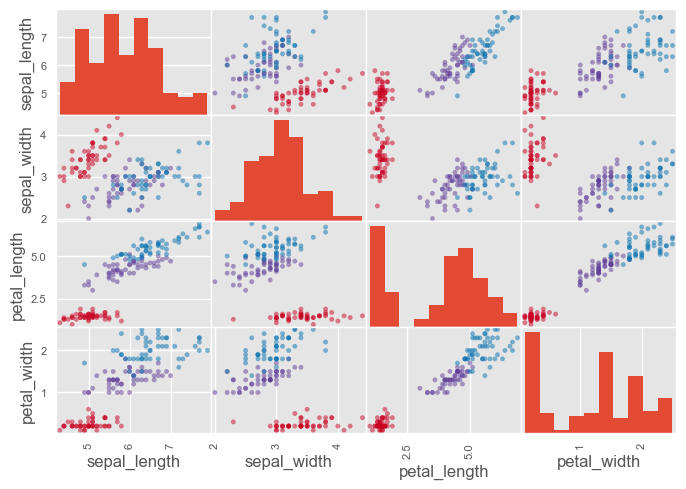

In [34]:
scatter_matrix(iris, color=color_list)
print()

# Altair

[Altair](https://altair-viz.github.io/) is a modern plotting library based on Vega. We're not going to go into details, but we've compiled a couple of examples below. 

You will likely have to install Altair: 

`
$ pip install altair vega_datasets
`

In [35]:
import altair as alt

In [36]:
movies = pd.read_csv('http://vcg.github.io/upset/data/movies/movies.csv', sep=';')
movies.head()

movies_genre = movies.copy(deep=True)
movies_genre['Genre'] = movies.loc[:,'Action':'Western'].idxmax(1)
movies_genre = movies_genre[['Name', 'Genre', 'ReleaseDate', 'AvgRating', 'Watches']]

movies_genre.head()

Name      Genre  ReleaseDate  AvgRating  \
0                    Toy Story (1995)   Children         1995       4.15   
1                      Jumanji (1995)  Adventure         1995       3.20   
2             Grumpier Old Men (1995)     Comedy         1995       3.02   
3            Waiting to Exhale (1995)     Comedy         1995       2.73   
4  Father of the Bride Part II (1995)     Comedy         1995       3.01   

   Watches  
0     2077  
1      701  
2      478  
3      170  
4      296

## Basic Charts

In [37]:
alt.Chart(movies_genre).mark_point()

alt.Chart(...)

The above chart is not really useful, since it just shows all the movies on top of each other. Each row in the dataset is a `mark`.

To make this into an useful chart,  we have to encode the columns.

We will encode AvgRating along `x-axis`.

In [38]:
alt.Chart(movies_genre).mark_tick().encode(
  x='AvgRating'
)

alt.Chart(...)

We can use other marks like 'point'.

There are a number of available marks that you can use; some of the more common are the following:

* ``mark_point()`` 
* ``mark_circle()``
* ``mark_square()``
* ``mark_line()``
* ``mark_area()``
* ``mark_bar()``
* ``mark_tick()``

You can get a complete list of ``mark_*`` methods using Jupyter's tab-completion feature: in any cell just type:

    alt.Chart.mark_
    
### Encodings

The next step is to add *visual encoding channels* (or *encodings* for short) to the chart. An encoding channel specifies how a given data column should be mapped onto the visual properties of the visualization.
Some of the more frequenty used visual encodings are listed here:

* ``x``: x-axis value
* ``y``: y-axis value
* ``color``: color of the mark
* ``opacity``: transparency/opacity of the mark
* ``shape``: shape of the mark
* ``size``: size of the mark
* ``row``: row within a grid of facet plots
* ``column``: column within a grid of facet plots

For a complete list of these encodings, see the [Encodings](https://altair-viz.github.io/user_guide/encoding.html) section of the documentation.

Visual encodings can be created with the `encode()` method of the `Chart` object. 

In [39]:
alt.Chart(movies_genre).mark_point().encode(
  x='AvgRating'
)

alt.Chart(...)

One of the central ideas of Altair is that the library will **choose good defaults for your data type**.

The basic data types supported by Altair are as follows:

<table>
  <tr>
    <th>Data Type</th>
    <th>Code</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>quantitative</td>
    <td>Q</td>
    <td>Numerical quantity (real-valued)</td>
  </tr>
  <tr>
    <td>nominal</td>
    <td>N</td>
    <td>Name / Unordered categorical</td>
  </tr>
  <tr>
    <td>ordinal</td>
    <td>O</td>
    <td>Ordered categorial</td>
  </tr>
  <tr>
    <td>temporal</td>
    <td>T</td>
    <td>Date/time</td>
  </tr>
</table>

When you specify data as a pandas dataframe, these types are **automatically determined** by Altair.

We can encode another variable along Y-axis to turn it into a scatter plot.

Let us plot `ReleaseDate` on X-axis and `AvgRating` on Y-axis.

In [40]:
alt.Chart(movies_genre).mark_point().encode(
  x = 'ReleaseDate',
  y = 'AvgRating'
)

alt.Chart(...)

Having axis start from 0 does not always makes sense, we can turn off this behaviour.

We will use [`altair.Scale`](https://altair-viz.github.io/user_guide/generated/core/altair.Scale.html), [altair.X](https://altair-viz.github.io/user_guide/generated/channels/altair.X.html), and [altair.Y](https://altair-viz.github.io/user_guide/generated/channels/altair.Y.html)

In [41]:
alt.Chart(movies_genre).mark_point().encode(
  alt.X('ReleaseDate', scale = alt.Scale(zero = False)),
  alt.Y('AvgRating', scale = alt.Scale(zero = False))
)

alt.Chart(...)

We can replace this `point` mark with `circle`

In [42]:
alt.Chart(movies_genre).mark_circle().encode(
  alt.X('ReleaseDate', scale = alt.Scale(zero = False)),
  alt.Y('AvgRating', scale = alt.Scale(zero = False))
)

alt.Chart(...)

We can encode another variable as color of the marks. We will use `Children`, `Horror`,  and `Documentary` genres only.

In [43]:
select_genres = movies_genre[movies_genre['Genre'].isin(['Children', 'Horror', 'Documentary'])]

alt.Chart(select_genres).mark_circle().encode(
  alt.X('ReleaseDate', scale = alt.Scale(zero = False)),
  alt.Y('AvgRating', scale = alt.Scale(zero = False)),
  color='Genre'
)

alt.Chart(...)

We can also color using a continous variable, let us try `Watches`.

In [44]:
alt.Chart(select_genres).mark_circle().encode(
  alt.X('ReleaseDate', scale = alt.Scale(zero = False)),
  alt.Y('AvgRating', scale = alt.Scale(zero = False)),
  color='Watches'
)

alt.Chart(...)

In both cases, `Altair` automatically selects proper colormaps

## Binning and Aggregation

We can bin our data and create histograms.

Altair does not have special functions to create a histogram like matplotlib.

We use `alt.X()` for the x encoding and `count()`  for y.

We will also change the `mark` type to `bar`.

In [45]:
alt.Chart(movies_genre).mark_bar().encode(
  x = alt.X('AvgRating', bin=True),
  y = 'count()'
)

alt.Chart(...)

We can control the bins using `altair.Bin`

In [46]:
alt.Chart(movies_genre).mark_bar().encode(
  x = alt.X('AvgRating', bin=alt.Bin(maxbins = 5)),
  y = 'count()',
)

alt.Chart(...)

The data will be automatically grouped within each bin, if we apply another encoding e.g. `color`.

In [47]:
alt.Chart(select_genres).mark_bar().encode(
  x = alt.X('AvgRating', bin=alt.Bin(maxbins = 5)),
  y = 'count()',
  color = 'Genre'
)

alt.Chart(...)

We can make a seperate plot for each category if we use `column` encoding.

In [48]:
alt.Chart(select_genres).mark_bar().encode(
  x = alt.X('AvgRating', bin=alt.Bin(maxbins = 5)),
  y = 'count()',
  color = 'Genre',
  column = 'Genre'
)

alt.Chart(...)

## Line Chart

We will plot mean average rating for each year.



In [49]:
alt.Chart(movies_genre).mark_line().encode(
  x = 'ReleaseDate',
  y = alt.X('mean(AvgRating)', scale=alt.Scale(zero=False))
)

alt.Chart(...)

## Interactions

We can add simple interactions using `interactive` function.

This enables simple interactions like zooming and panning.

In [50]:
alt.Chart(movies_genre).mark_circle().encode(
  alt.X('ReleaseDate', scale = alt.Scale(zero = False)),
  alt.Y('AvgRating', scale = alt.Scale(zero = False))
).interactive()

alt.Chart(...)

### Selections

In [51]:
interval = alt.selection_interval()

alt.Chart(select_genres).mark_circle().encode(
  alt.X('ReleaseDate', scale = alt.Scale(zero = False)),
  alt.Y('AvgRating', scale = alt.Scale(zero = False)),
  color='Genre'
).properties(
  selection=interval
)

alt.Chart(...)

This just enables a rectangular brush selection.

Currently this selection does nothing.

We can use conditional highlighting when selection made. We use `altair.condition`

In [52]:
interval = alt.selection_interval()

alt.Chart(select_genres).mark_circle().encode(
  alt.X('ReleaseDate', scale = alt.Scale(zero = False)),
  alt.Y('AvgRating', scale = alt.Scale(zero = False)),
  color = alt.condition(interval, 'Genre', alt.value('lightgray'))
).properties(
  selection=interval
)

alt.Chart(...)

Seleciton API automatically applies to all the compound charts, as long as they have same selection applied.

Let us see an example with two horizontally concatenated charts.



In [53]:
interval = alt.selection_interval()


base = alt.Chart(select_genres).mark_circle().encode(
  alt.X('ReleaseDate', scale = alt.Scale(zero = False)),
  color = alt.condition(interval, 'Genre', alt.value('lightgray'))
).properties(
  selection=interval
)

base.encode(y = alt.Y('AvgRating', scale=alt.Scale(zero=False))) | base.encode(y = alt.Y('Watches', scale=alt.Scale(zero=False)))

alt.HConcatChart(...)

We can combine Layering and Selection API to do complicated interactions. Let us combine the above chart with histogram which shows counts for selections.

In [54]:
interval = alt.selection_interval()


base = alt.Chart(select_genres).mark_circle().encode(
  alt.X('ReleaseDate', scale = alt.Scale(zero = False)),
  color = alt.condition(interval, 'Genre', alt.value('lightgray'))
).properties(
  selection=interval
)

hist = alt.Chart(select_genres).mark_bar().encode(
  x = 'count()',
  y = 'Genre',
  color = 'Genre'
).properties(
  width = 800,
  height = 100
).transform_filter(
  interval
)

scatter = base.encode(y = alt.Y('AvgRating', scale=alt.Scale(zero=False))) | base.encode(y = alt.Y('Watches', scale=alt.Scale(zero=False)))

scatter & hist

alt.VConcatChart(...)

In [55]:
interval = alt.selection_interval()


scatter1 = alt.Chart(select_genres).mark_circle().encode(
  alt.X('ReleaseDate', scale = alt.Scale(zero = False)),
    y = alt.Y('AvgRating', scale=alt.Scale(zero=False)),
  color = alt.condition(interval, 'Genre', alt.value('lightgray'))
).properties(
  selection=interval
)

scatter2 = alt.Chart(select_genres).mark_circle().encode(
  alt.X('ReleaseDate', scale = alt.Scale(zero = False)),
    y = alt.Y('Watches', scale=alt.Scale(zero=False)),
  color = alt.condition(interval, 'Genre', alt.value('lightgray'))
).transform_filter(
  interval
)


scatter1 | scatter2

alt.HConcatChart(...)

## Maps

Altair can also do maps, based on it's `mark_geoshape` mark. See the [source for this example](https://altair-viz.github.io/gallery/choropleth.html#gallery-choropleth).

In [57]:
from vega_datasets import data

counties = alt.topo_feature(data.us_10m.url, 'counties')
source = data.unemployment.url

alt.Chart(counties).mark_geoshape().encode(
    color='rate:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', ['rate'])
).project(
    type='albersUsa'
).properties(
    width=500,
    height=300
)

alt.Chart(...)